In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer

In [2]:
data = pd.read_csv("G:\Shivansh\iNeuron\Internship\Backorder Prediction\Data\Kaggle_Training_Dataset_v2.csv")

In [3]:
data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [4]:
data=data.iloc[:-1,:]

In [5]:
data.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [8]:
numerical_cols = [feature for feature in data.columns if data[feature].dtypes!='O']
scaler = StandardScaler()
scaled_num_col = pd.DataFrame(scaler.fit_transform(data.loc[:,numerical_cols]),columns=numerical_cols)

In [9]:
scaled_num_col

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.016752,NaN,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,-3.469149,-3.581662,-0.018577
1,-0.016684,0.159826,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,0.296052,0.287422,-0.018577
2,-0.016684,NaN,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,-3.469149,-3.581662,-0.018577
3,-0.016516,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.041253,-0.008659,0.262538,0.254145,-0.018577
4,-0.016482,NaN,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,-0.040457,-0.008659,-3.469149,-3.581662,-0.018577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,-0.016752,-0.832235,-0.032808,-0.033446,-0.034199,-0.034520,-0.029004,-0.032745,-0.034820,-0.034927,-0.042050,-0.008659,0.284755,0.275814,0.129693
1687856,-0.016786,NaN,-0.032808,-0.034441,-0.034506,-0.034590,-0.028486,-0.033130,-0.035236,-0.034860,-0.042050,-0.008659,-3.469149,-3.581662,0.011077
1687857,-0.016786,0.159826,-0.032808,-0.034043,-0.034301,-0.034451,-0.029004,-0.032168,-0.034404,-0.034590,-0.042050,-0.008659,0.291157,0.281618,0.011077
1687858,-0.014658,0.159826,-0.020892,-0.027677,-0.026338,-0.026453,-0.010853,-0.021575,-0.019632,-0.021584,-0.032488,-0.008659,0.291157,0.281618,0.159347


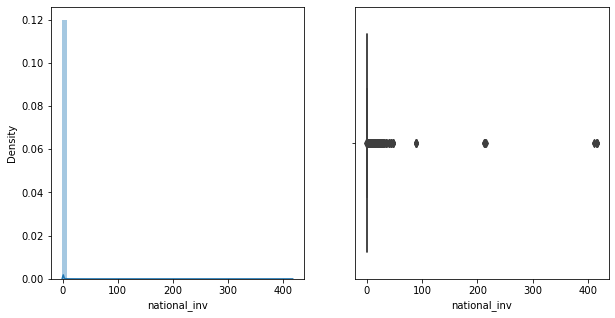

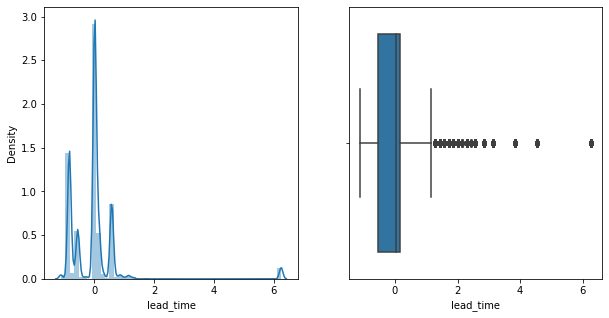

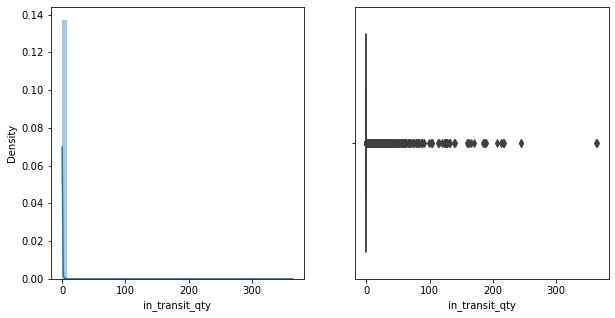

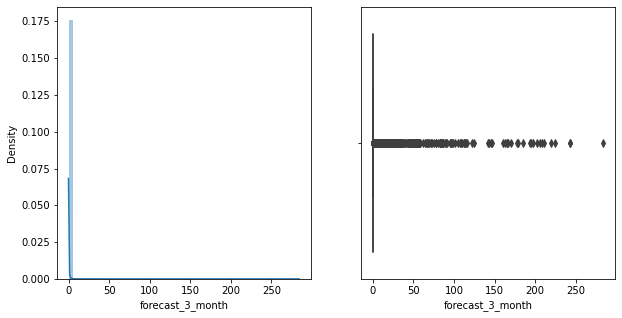

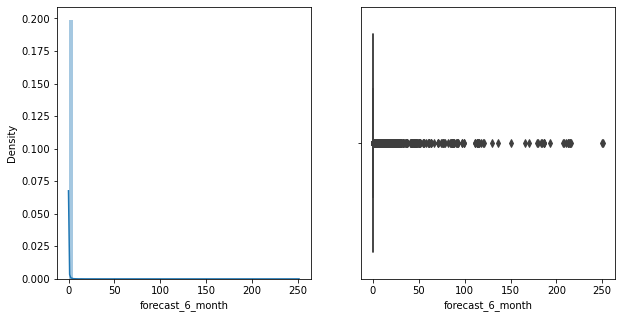

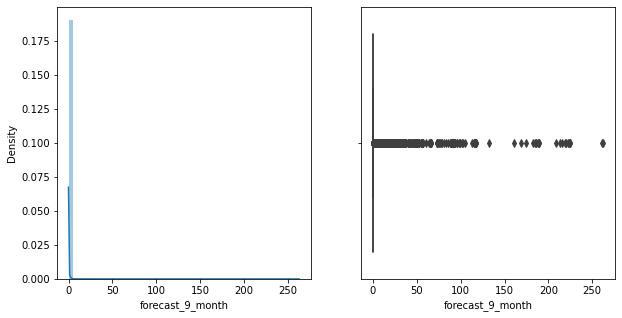

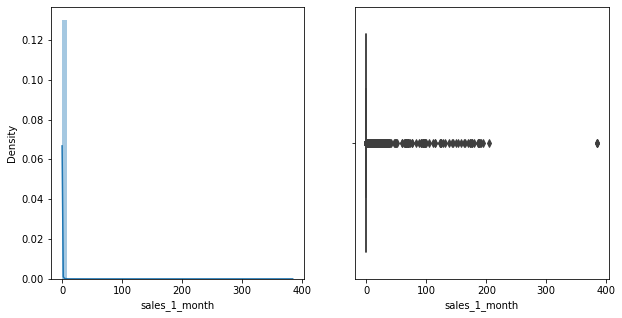

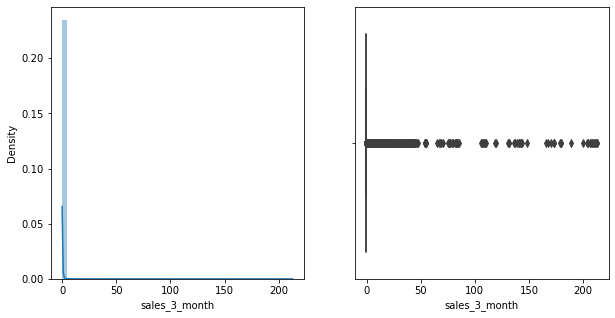

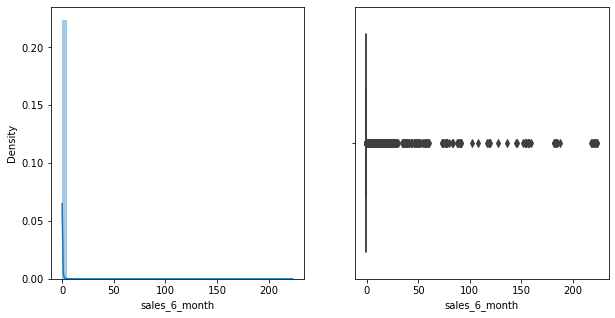

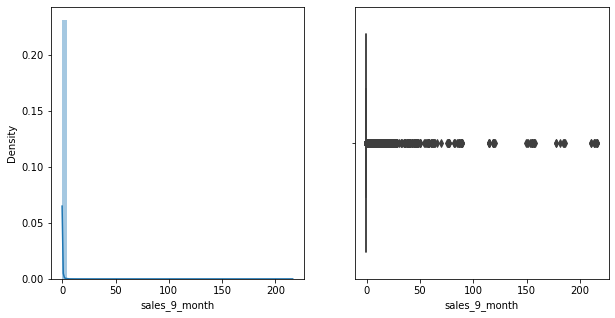

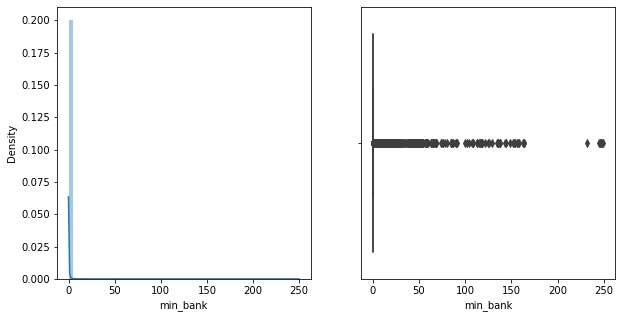

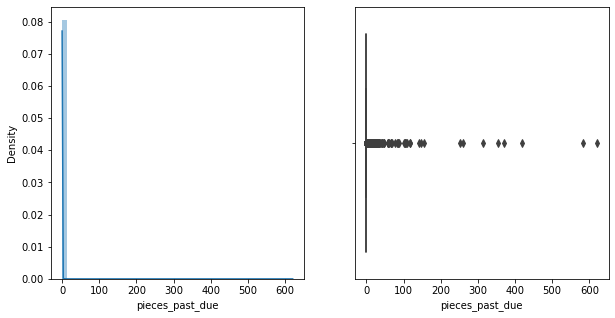

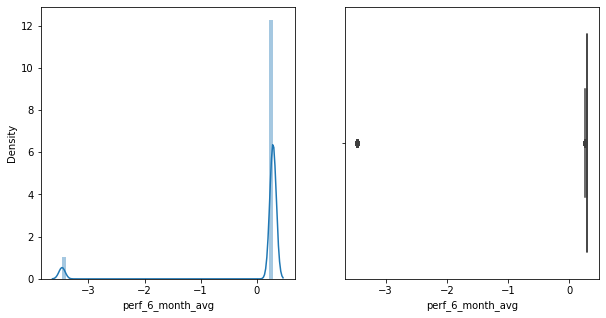

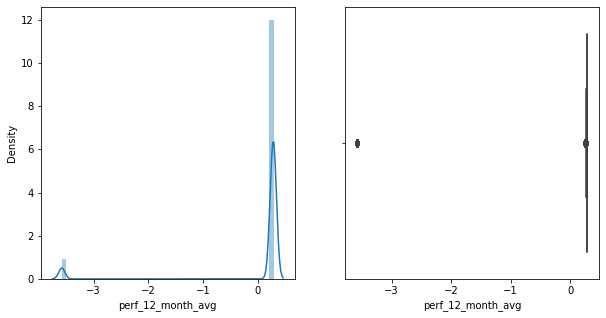

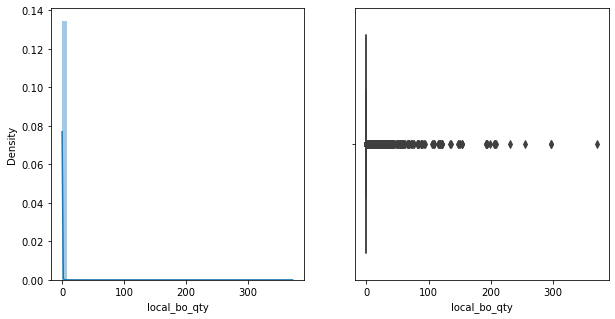

In [10]:
for feature in numerical_cols:
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.distplot(scaled_num_col[feature],ax=ax1)
    sns.boxplot(scaled_num_col[feature],ax=ax2)
    plt.show()

In [11]:
 data["went_on_backorder"].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [12]:
power = PowerTransformer(method='yeo-johnson',standardize=True)
powered_data = pd.DataFrame(power.fit_transform(data.loc[:,numerical_cols]),columns=numerical_cols)

In [13]:
powered_data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.065044,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.958580,-1.049791,-1.102320,-0.857913,-0.123332,-2.617953,-2.668166,-0.118420
1,-0.063067,0.500224,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.958580,-1.049791,-1.102320,-0.857913,-0.123332,0.920468,0.973754,-0.118420
2,-0.063067,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.958580,-1.049791,-1.102320,-0.857913,-0.123332,-2.617953,-2.668166,-0.118420
3,-0.059309,0.324634,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.958580,-1.049791,-1.102320,0.122850,-0.123332,-1.449815,-1.468506,-0.118420
4,-0.058648,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.958580,-1.049791,-0.049247,0.524241,-0.123332,-2.617953,-2.668166,-0.118420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,-0.065044,-1.462220,-0.500204,1.420784,1.085538,0.911149,-0.805595,0.494675,0.351445,0.191962,-0.857913,-0.123332,-0.187274,-0.193820,8.444525
1687856,-0.066344,NaN,-0.500204,1.177581,0.955070,0.872937,0.175337,0.246495,-0.029848,0.248455,-0.857913,-0.123332,-2.617953,-2.668166,8.444525
1687857,-0.066344,0.500224,-0.500204,1.306290,1.048740,0.944664,-0.805595,0.707433,0.542992,0.415350,-0.857913,-0.123332,0.395657,0.341075,8.444525
1687858,-0.033382,0.500224,2.119725,1.689145,1.563061,1.499760,1.620898,1.378716,1.361599,1.306416,1.348683,-0.123332,0.395657,0.341075,8.444525


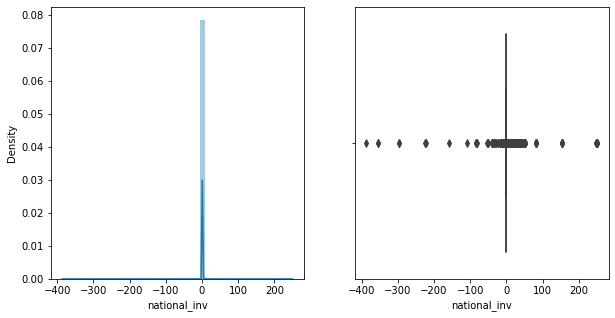

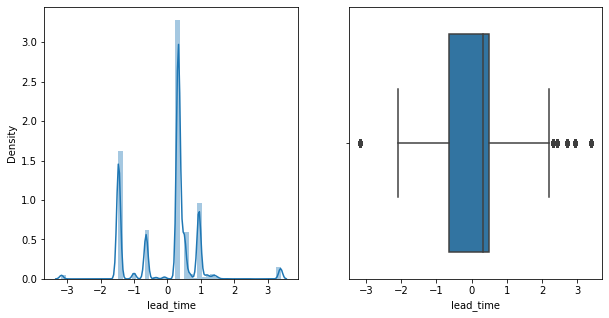

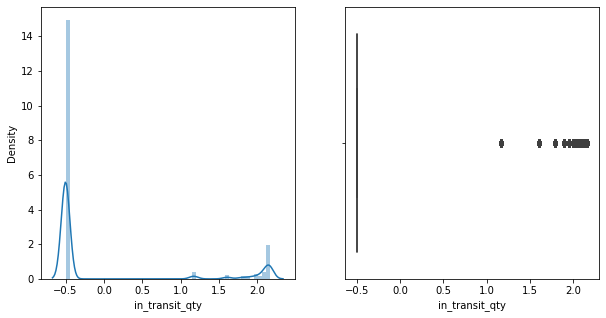

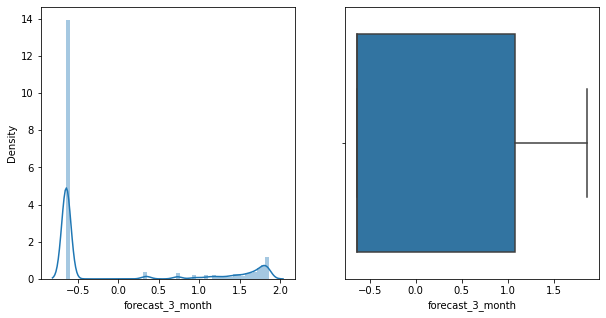

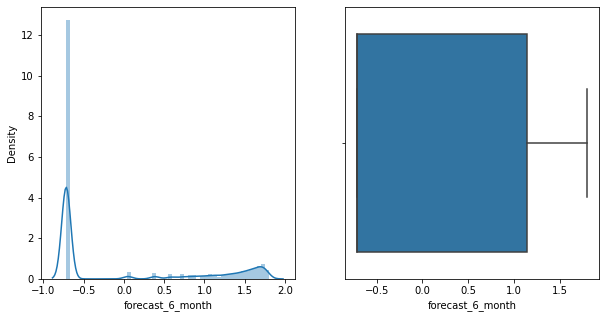

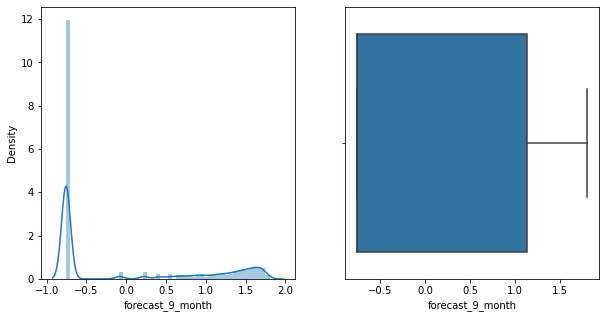

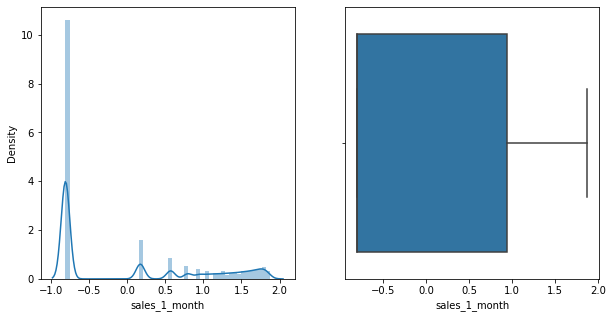

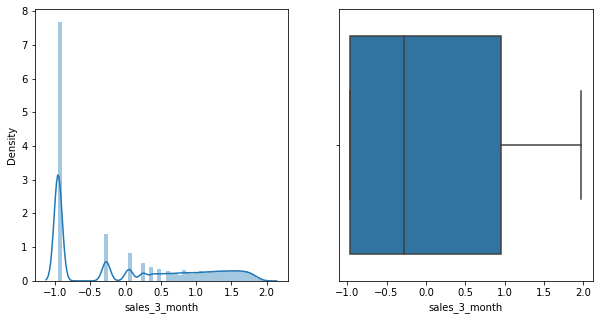

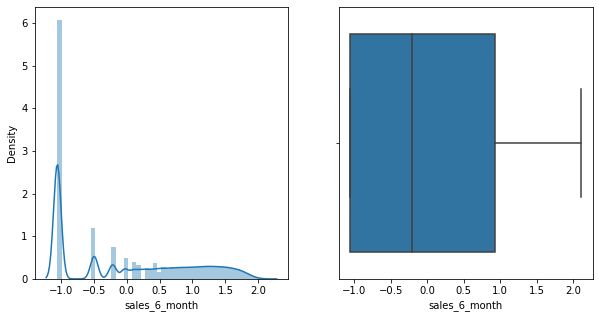

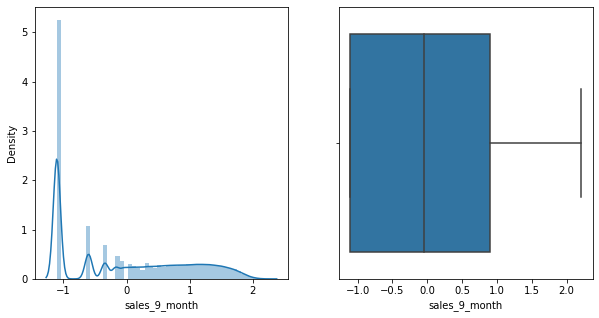

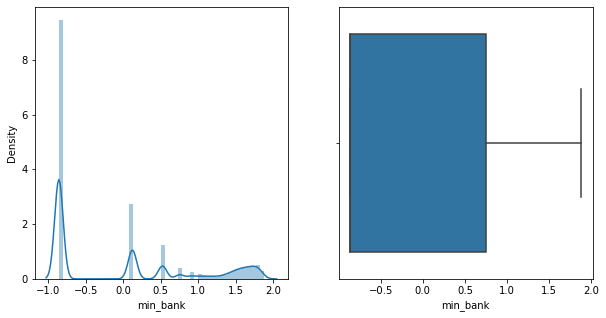

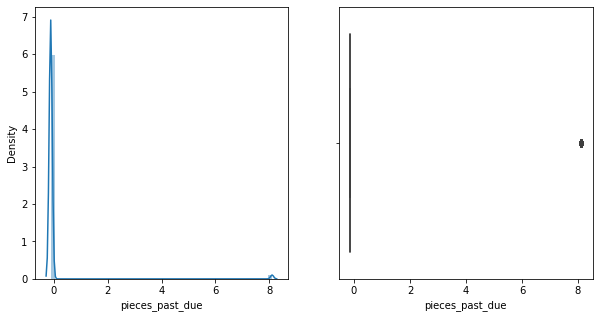

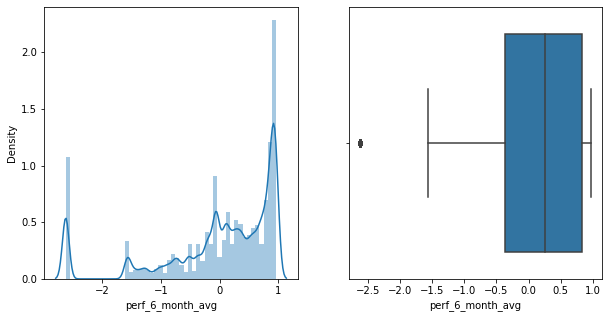

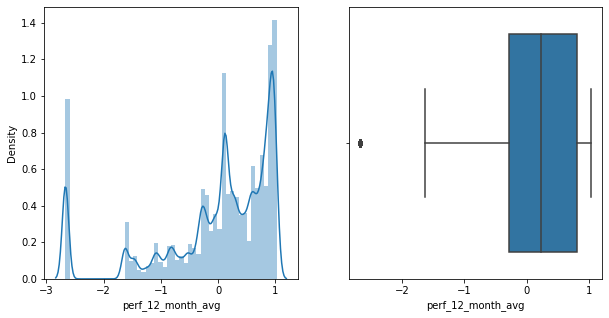

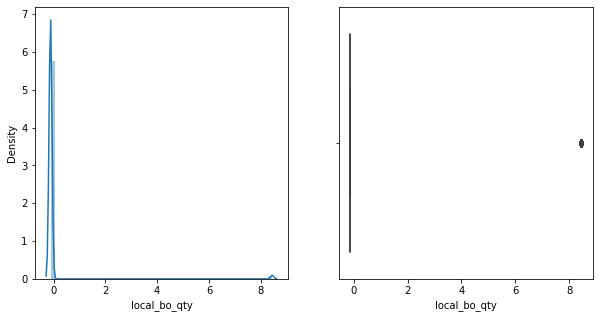

In [14]:
for feature in numerical_cols:
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.distplot(powered_data[feature],ax=ax1)
    sns.boxplot(powered_data[feature],ax=ax2)
    plt.show()

In [15]:
quantile = QuantileTransformer(output_distribution='normal')
quantile_data = pd.DataFrame(quantile.fit_transform(data.loc[:,numerical_cols]),columns=numerical_cols)

In [16]:
data_yes = data[data["went_on_backorder"]=='Yes']
data_no = data[data["went_on_backorder"]=='No']

In [17]:
data_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,11293.0,21.432746,608.192119,-2999.0,0.00,1.00,6.00,29332.0
lead_time,10969.0,6.322545,4.102076,0.0,2.00,8.00,8.00,52.0
in_transit_qty,11293.0,4.338617,47.313292,0.0,0.00,0.00,0.00,2259.0
forecast_3_month,11293.0,157.314354,1634.781769,0.0,3.00,12.00,40.00,120000.0
forecast_6_month,11293.0,244.678916,2457.176079,0.0,5.00,19.00,64.00,170880.0
forecast_9_month,11293.0,325.939520,3145.250001,0.0,7.00,24.00,88.00,207160.0
sales_1_month,11293.0,29.364474,273.212029,0.0,0.00,3.00,9.00,20005.0
sales_3_month,11293.0,79.350748,509.481213,0.0,2.00,8.00,24.00,20033.0
sales_6_month,11293.0,139.271230,901.024234,0.0,3.00,14.00,43.00,27893.0
sales_9_month,11293.0,206.377668,1375.447106,0.0,4.00,19.00,63.00,43796.0


In [18]:
data_no.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1676567.0,499.309119,29714.739833,-27256.0,4.00,15.00,81.00,12334404.0
lead_time,1575998.0,7.883053,7.071072,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1676567.0,44.319523,1347.246791,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1676567.0,178.259421,5041.668512,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1676567.0,345.662315,9826.013034,0.0,0.00,0.00,11.00,2461360.0
forecast_9_month,1676567.0,507.579735,14424.952051,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1676567.0,56.104982,1934.547772,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1676567.0,175.670378,5209.661919,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1676567.0,343.092551,9645.191056,0.0,0.00,2.00,30.00,2146625.0
sales_9_month,1676567.0,527.417690,14888.053478,0.0,0.00,4.00,46.00,3205172.0


In [19]:
def plot(data,feature):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.distplot(data[feature],ax=ax1)
    sns.boxplot(data[feature],ax=ax2)
    plt.show()

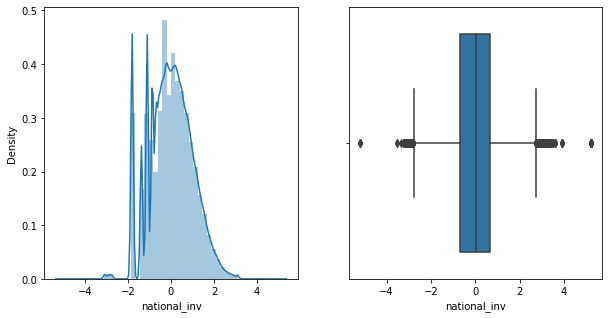

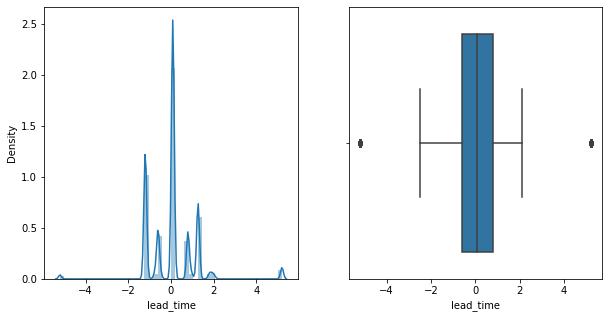

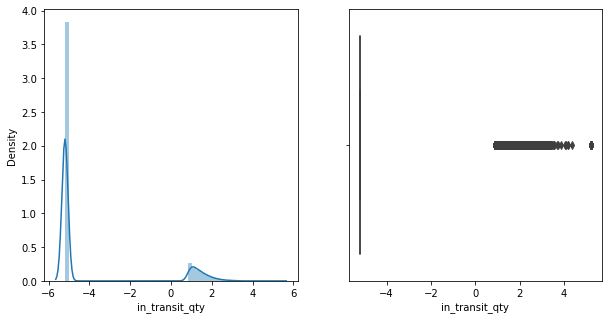

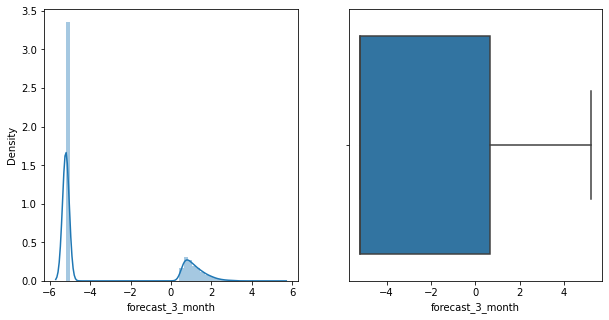

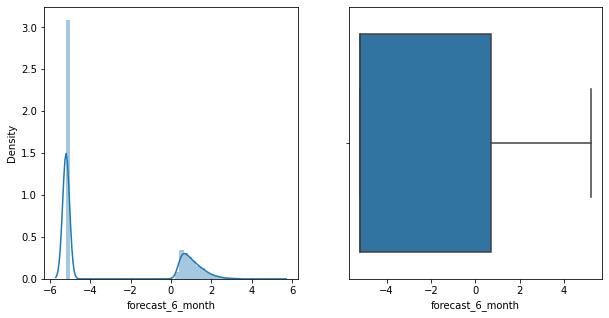

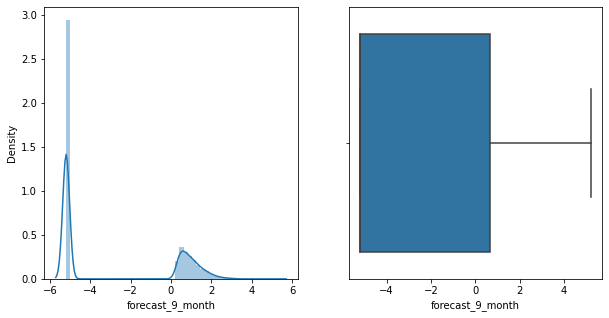

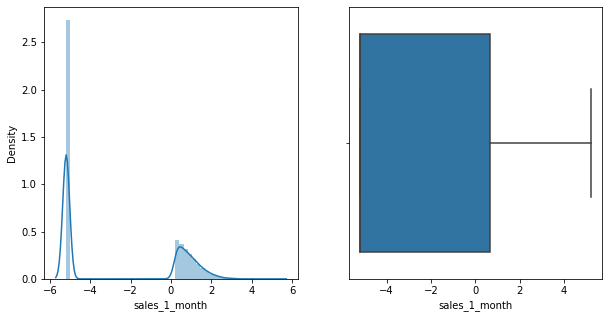

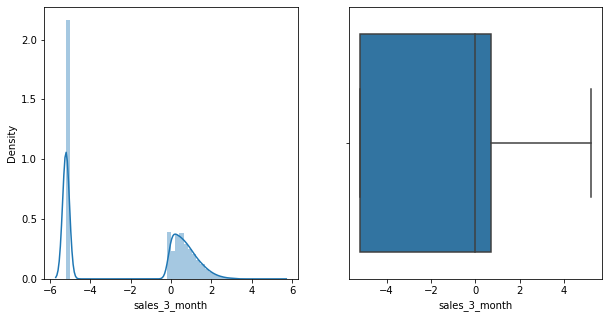

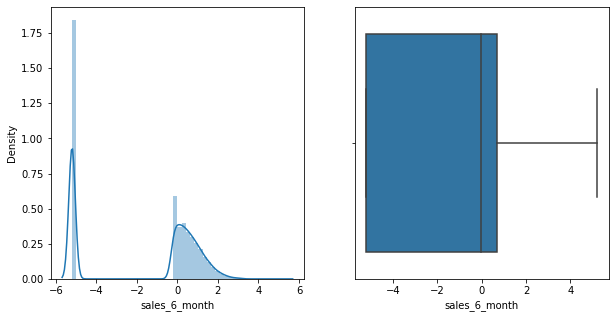

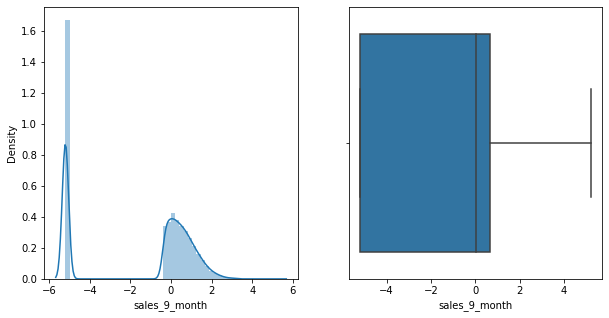

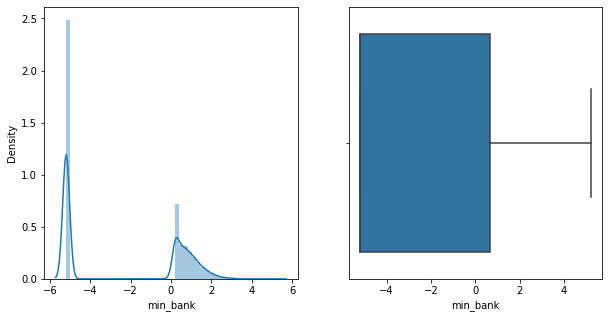

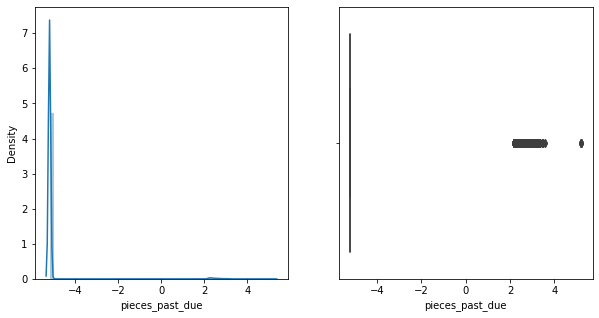

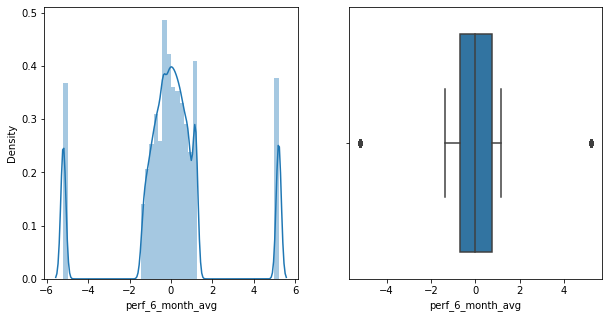

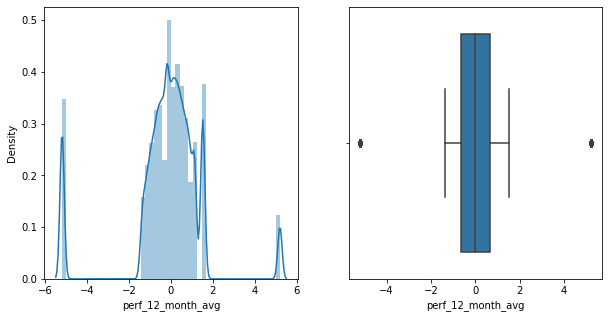

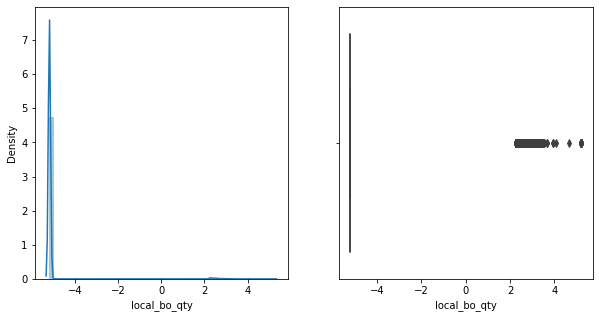

In [20]:
for feature in numerical_cols:
    plot(quantile_data,feature)

In [21]:
data["lead_time"].fillna(data["lead_time"].median(),inplace=True)

In [22]:
data["perf_6_month_avg"] = np.where(data["perf_6_month_avg"]== -99,np.nan,data["perf_6_month_avg"])
data["perf_12_month_avg"] = np.where(data["perf_12_month_avg"]== -99,np.nan,data["perf_12_month_avg"])
data["national_inv"] = np.where(data["national_inv"]<0,np.nan,data["national_inv"])

In [23]:
data["perf_6_month_avg"].fillna(data["perf_6_month_avg"].median(),inplace=True)
data["perf_12_month_avg"].fillna(data["perf_12_month_avg"].median(),inplace=True)
data["national_inv"].fillna(data["national_inv"].median(),inplace=True)

In [24]:
data_yes = data[data["went_on_backorder"]=='Yes']
data_no = data[data["went_on_backorder"]=='No']

In [25]:
def outliers_check(data):
    p95 = data.quantile(0.95)
    p99 = data.quantile(0.99)
    p100 = data.quantile(1)
    return pd.DataFrame(data={"95%":p95,"99%":p99,"100%":p100})

In [26]:
outliers_check(data_no)

,95%,99%,100%
national_inv,929.00,5506.00,12334404.0
lead_time,12.00,52.00,52.0
in_transit_qty,68.00,574.00,489408.0
forecast_3_month,300.00,2287.00,1427612.0
forecast_6_month,596.00,4343.34,2461360.0
forecast_9_month,894.00,6334.34,3777304.0
sales_1_month,107.00,701.00,741774.0
sales_3_month,351.00,2242.00,1105478.0
sales_6_month,699.00,4423.00,2146625.0
sales_9_month,1064.00,6721.00,3205172.0


In [27]:
def outlier_removal(df,feature):
    p95 = df[feature].quantile(0.95)
    p99 = df[feature].quantile(0.99)
    p100 = df[feature].quantile(1)
    
    if (p100 - p99) > (p99-p95):
        q = df[feature].quantile(0.99)
        return df[data[feature]<q]
    
    elif (p100 - p99) < (p99-p95):
        q = df[feature].quantile(0.95)
        return df[df[feature]<q]

In [28]:
data2 = data.copy()

In [29]:
data2

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.85,0.83,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.85,0.83,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,0.85,0.83,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,15.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,0.85,0.83,1.0,No,No,No,Yes,No,No
1687857,1524346,15.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [30]:
for feature in numerical_cols:
    data2 = outlier_removal(data2,feature)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
data2

In [1]:
!pip install patool

  Using cached patool-1.12-py2.py3-none-any.whl (77 kB)


In [2]:
!pip install pyunpack

In [6]:
from pyunpack import Archive
import requests
from unrar import rarfile
from io import BytesIO
import os

In [9]:
path = r"C:\Users\admin\Downloads\dataset(1).rar"
download_url = "https://github.com/shivanshka/dataset/blob/main/backorder_data.rar?raw=true"

In [10]:
#Archive(path).extractall(".")
file_path = os.path.join(r"C:\Users\admin\Desktop\New folder","backorder_data.rar")

In [11]:
import urllib
urllib.request.urlretrieve(download_url,file_path)

('C:\\Users\\admin\\Desktop\\New folder\\backorder_data.rar',
 <http.client.HTTPMessage at 0x1e1e8cd4190>)

In [20]:
req = requests.get(download_url)

In [12]:
rar_ref = rarfile.RarFile(file_path)

In [13]:
rar_ref.extractall(".")